In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_predict
import warnings
warnings.simplefilter("ignore")

In [ ]:
df_test = pd.read_csv("bc_test_data_10.csv")
df_test.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,901288,M,20.64,17.35,134.80,1335.0,0.09446,0.1076,0.1527,0.08941,...,25.37,23.17,166.8,1946.0,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055
1,8860702,M,17.30,17.08,113.00,928.2,0.10080,0.1041,0.1266,0.08353,...,19.85,25.09,130.9,1222.0,0.1416,0.2405,0.3378,0.1857,0.3138,0.08113
2,877500,M,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,0.05980,...,18.33,30.12,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130


In [ ]:
df = pd.read_csv("bc_data_90.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
print(df.shape)

print(df.diagnosis.value_counts())

(512, 32)
B    319
M    193
Name: diagnosis, dtype: int64


In [ ]:
df.diagnosis = df.diagnosis.replace({'M':1, 'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.drop("id", axis = 1, inplace = True)

In [ ]:
# split the data set into independent (X) and dependent (Y) data sets
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
RF = RandomForestClassifier(criterion='entropy')

In [ ]:
cv = KFold(n_splits=10)

In [ ]:
y_pred = cross_val_predict(RF, X, y, cv=cv)

In [ ]:
cm = confusion_matrix(y, y_pred)
cm

array([[312,   7],
       [ 14, 179]], dtype=int64)

Text(0.5, 15.0, 'Predicted Values')

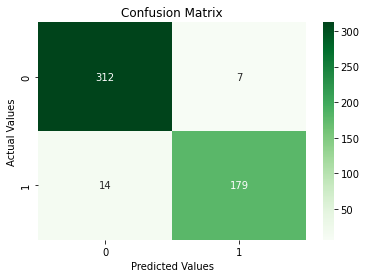

In [ ]:
#plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [ ]:
from sklearn.model_selection import cross_validate
cv_re = cross_validate(RF, X,y, cv=10, return_estimator=True)
sum = [0] * 30
for model in cv_re['estimator']:
    sum = sum + model.feature_importances_
avg = sum/10

In [ ]:
avg

array([0.03707648, 0.01852089, 0.04012955, 0.04479128, 0.00766168,
       0.01273131, 0.04319592, 0.09063504, 0.00442227, 0.00433404,
       0.01624636, 0.00494027, 0.01303031, 0.03425376, 0.00507515,
       0.00584012, 0.00598177, 0.0076566 , 0.00591828, 0.00598504,
       0.09366324, 0.02562127, 0.12976062, 0.10939452, 0.01751869,
       0.01748775, 0.04113275, 0.13788289, 0.01012352, 0.00898863])

In [ ]:
fi = avg.tolist()
cols= df.columns[1:].tolist()
dic = {'feature':cols, 'feature importance': avg}
df_fi = pd.DataFrame(dic)
df_fi

,feature,feature importance
0,radius_mean,0.037076
1,texture_mean,0.018521
2,perimeter_mean,0.040130
3,area_mean,0.044791
4,smoothness_mean,0.007662
5,compactness_mean,0.012731
6,concavity_mean,0.043196
7,concave points_mean,0.090635
8,symmetry_mean,0.004422
9,fractal_dimension_mean,0.004334


In [ ]:
df_fi.sort_values('feature importance',ascending=False, inplace=True)

In [ ]:
df_fi

,feature,feature importance
27,concave points_worst,0.137883
22,perimeter_worst,0.129761
23,area_worst,0.109395
20,radius_worst,0.093663
7,concave points_mean,0.090635
3,area_mean,0.044791
6,concavity_mean,0.043196
26,concavity_worst,0.041133
2,perimeter_mean,0.040130
0,radius_mean,0.037076


There are three versions of NearMiss algorithms.
“NearMiss-1 selects the positive samples for which the average distance to the N closest samples of the negative class is the smallest.”
“NearMiss-2 selects the positive samples for which the average distance to the N farthest samples of the negative class is the smallest.”
“NearMiss-3 is a 2-steps algorithm. First, for each negative sample, their M nearest-neighbors will be kept. Then, the positive samples selected are the one for which the average distance to the N nearest-neighbors is the largest.”

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
# Under sample the majority class
#nm = NearMiss(version=1)
#X_nm, y_nm= nm.fit_resample(X, y)
# Check the number of records after over sampling
#print(sorted(Counter(y_nm).items()))

[(0, 193), (1, 193)]


In [ ]:
#rus = RandomUnderSampler(random_state=42)
#X_rus, y_rus= nm.fit_resample(X, y)

In [ ]:
#y_pred_rus = cross_val_predict(RF, X_rus, y_rus, cv=cv)

In [ ]:
#cm_rus = confusion_matrix(y_rus, y_pred_rus)
#cm_rus

array([[180,  13],
       [ 17, 176]], dtype=int64)

In [ ]:
#y_pred_nm = cross_val_predict(RF, X_nm, y_nm, cv=cv)

In [ ]:
#cm_nm = confusion_matrix(y_nm, y_pred_nm)
#cm_nm

array([[181,  12],
       [ 17, 176]], dtype=int64)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
y_pred_sm = cross_val_predict(RF, X_sm, y_sm, cv=cv)

In [ ]:
cm_sm = confusion_matrix(y_sm, y_pred_sm)
cm_sm

array([[307,  12],
       [ 12, 307]], dtype=int64)

In [ ]:
print(classification_report(y_sm, y_pred_sm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       319
           1       0.96      0.96      0.96       319

    accuracy                           0.96       638
   macro avg       0.96      0.96      0.96       638
weighted avg       0.96      0.96      0.96       638



Text(0.5, 15.0, 'Predicted Values')

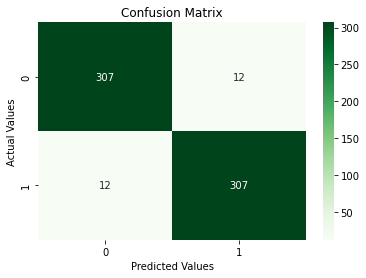

In [ ]:
#plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_sm, annot=True,fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_random.fit(X_sm, y_sm)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
RF_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
rf_para = RandomForestClassifier(criterion='entropy', n_estimators=1000, min_samples_split=2, min_samples_leaf = 1, 
                                 max_features = 'auto',  max_depth=50, bootstrap =False)

In [ ]:
y_pred_para = cross_val_predict(rf_para, X_sm, y_sm, cv=cv)

In [ ]:
cm1 = confusion_matrix(y_sm, y_pred_para)

In [ ]:
print(classification_report(y_sm, y_pred_para))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       319
           1       0.97      0.96      0.97       319

    accuracy                           0.97       638
   macro avg       0.97      0.97      0.97       638
weighted avg       0.97      0.97      0.97       638



Text(0.5, 15.0, 'Predicted Values')

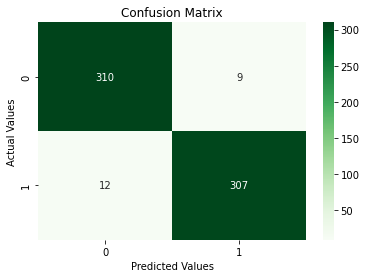

In [ ]:
plt.title('Confusion Matrix')
sns.heatmap(cm1, annot=True,fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [ ]:
from sklearn.model_selection import cross_validate
cv_para = cross_validate(rf_para, X_sm,y_sm, cv=10, return_estimator=True)
sum_para = [0] * 30
for model in cv_para['estimator']:
    sum = sum + model.feature_importances_
avg_para = sum/10

In [ ]:
fi_para = avg_para.tolist()
fi_para
cols = df.columns[1:].tolist()
dic_para = {'feature':cols, 'feature importance': fi_para}
df_para = pd.DataFrame(dic_para)
df_para

,feature,feature importance
0,radius_mean,0.163652
1,texture_mean,0.072716
2,perimeter_mean,0.146889
3,area_mean,0.209475
4,smoothness_mean,0.032192
5,compactness_mean,0.052216
6,concavity_mean,0.182715
7,concave points_mean,0.359934
8,symmetry_mean,0.018347
9,fractal_dimension_mean,0.015079


In [ ]:
df_para.sort_values('feature importance',ascending=False, inplace=True )

In [ ]:
df_para

,feature,feature importance
27,concave points_worst,0.561286
22,perimeter_worst,0.547516
23,area_worst,0.412293
20,radius_worst,0.373950
7,concave points_mean,0.359934
3,area_mean,0.209475
6,concavity_mean,0.182715
26,concavity_worst,0.173147
0,radius_mean,0.163652
2,perimeter_mean,0.146889


In [ ]:
df_test = pd.read_csv('bc_test_data_10.csv')

In [ ]:
df_test['diagnosis'].value_counts()

B    38
M    19
Name: diagnosis, dtype: int64

In [ ]:
df_test.diagnosis = df_test.diagnosis.replace({'M':1, 'B':0})
df_test.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,901288,1,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.1527,0.08941,...,25.37,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055
1,8860702,1,17.30,17.08,113.00,928.2,0.10080,0.10410,0.1266,0.08353,...,19.85,25.09,130.90,1222.0,0.1416,0.2405,0.33780,0.18570,0.3138,0.08113
2,877500,1,14.45,20.22,94.49,642.7,0.09872,0.12060,0.1180,0.05980,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
3,859575,1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.1080,0.07951,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.26870,0.17890,0.2551,0.06589
4,914102,0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.0180,0.01256,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429


In [ ]:
X_test = df_test.iloc[:, 2:]
y_test = df_test.iloc[:, 1]

In [ ]:
rf_para.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,
                       max_features='auto', n_estimators=1000)

In [ ]:
y_test_pred = rf_para.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
cm2 = confusion_matrix(y_test, y_test_pred)
cm2

array([[38,  0],
       [ 0, 19]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        19

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



Text(0.5, 15.0, 'Predicted Values')

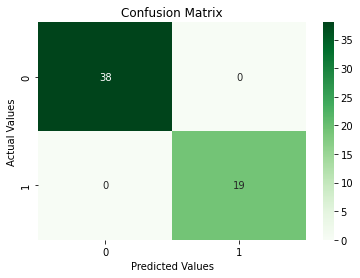

In [ ]:
plt.title('Confusion Matrix')
sns.heatmap(cm2, annot=True,fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')